<a href="https://colab.research.google.com/github/Carl-Zzdr/MLstudy/blob/main/HW241016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 定义故障类型
faults=['12DriveEndFault0.007-Ball_211',
        '12DriveEndFault0.007-InnerRace_214',
        '12DriveEndFault0.007-OuterRace6_217',
        '12DriveEndFault0.014-InnerRace_225',
        '12DriveEndFault0.021-InnerRace_226']

# 加载数据集
dataset=[]
for fault in faults:
    path='/content/'+fault+'.pkl'
    with open(path, 'rb') as f:
        data = pickle.load(f)
    dataset.extend(data)

# 将数据转换为numpy数组
dataset_x = np.array(dataset)
label_y = np.array([0]*600 + [1]*600 + [2]*600 + [3]*600 + [4]*600)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    dataset_x, label_y, test_size=0.3, random_state=54)


In [14]:
# 1. 决策树分类
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print('Tree:', acc_dt)
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))


Tree: 0.48444444444444446
              precision    recall  f1-score   support

           0       0.44      0.52      0.48       174
           1       0.41      0.43      0.42       183
           2       0.59      0.51      0.55       172
           3       0.53      0.50      0.52       186
           4       0.48      0.47      0.48       185

    accuracy                           0.48       900
   macro avg       0.49      0.49      0.49       900
weighted avg       0.49      0.48      0.49       900

[[90 24  7 41 12]
 [29 78 25 14 37]
 [16 26 88 12 30]
 [53 25  1 93 14]
 [16 39 29 14 87]]


In [16]:
# 2. Bagging分类
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=54)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)
acc_bagging = accuracy_score(y_test, y_pred_bagging)
print('Bagging Accuracy:', acc_bagging)
print(classification_report(y_test, y_pred_bagging))
print(confusion_matrix(y_test, y_pred_bagging))


Bagging Accuracy: 0.7155555555555555
              precision    recall  f1-score   support

           0       0.55      0.82      0.66       174
           1       0.68      0.70      0.69       183
           2       0.85      0.87      0.86       172
           3       0.73      0.63      0.67       186
           4       0.91      0.58      0.71       185

    accuracy                           0.72       900
   macro avg       0.74      0.72      0.72       900
weighted avg       0.74      0.72      0.72       900

[[142   7   0  23   2]
 [ 31 128   6  12   6]
 [  4  14 150   2   2]
 [ 64   4   0 117   1]
 [ 15  35  21   7 107]]


In [18]:
# 3. AdaBoost分类
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=54)
adaboost.fit(X_train, y_train)
y_pred_adaboost = adaboost.predict(X_test)
acc_adaboost = accuracy_score(y_test, y_pred_adaboost)
print('AdaBoost Accuracy:', acc_adaboost)
print(classification_report(y_test, y_pred_adaboost))
print(confusion_matrix(y_test, y_pred_adaboost))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.4811111111111111
              precision    recall  f1-score   support

           0       0.42      0.56      0.48       174
           1       0.41      0.39      0.40       183
           2       0.55      0.49      0.52       172
           3       0.57      0.51      0.54       186
           4       0.48      0.45      0.47       185

    accuracy                           0.48       900
   macro avg       0.49      0.48      0.48       900
weighted avg       0.49      0.48      0.48       900

[[98 23  7 33 13]
 [28 72 31 18 34]
 [21 21 84 15 31]
 [51 24  4 95 12]
 [34 34 27  6 84]]


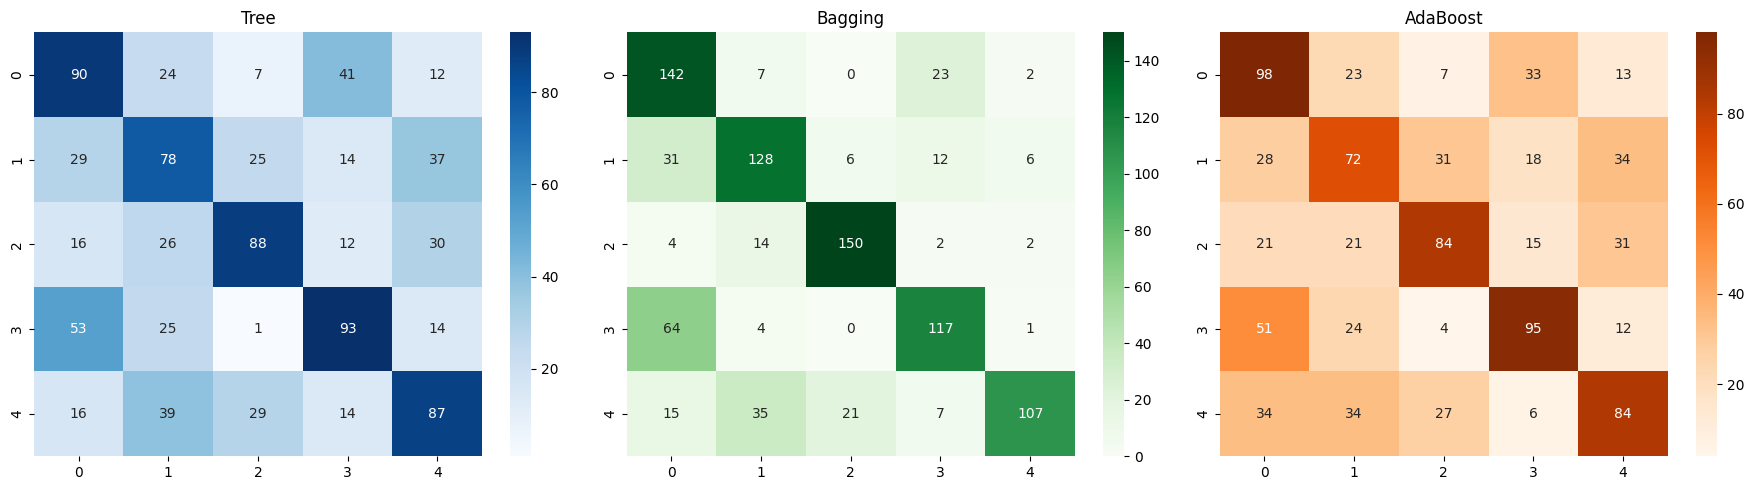

In [20]:

# 可视化混淆矩阵
import seaborn as sns
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title('Tree')

sns.heatmap(confusion_matrix(y_test, y_pred_bagging), annot=True, fmt='d', cmap='Greens', ax=axs[1])
axs[1].set_title('Bagging')

sns.heatmap(confusion_matrix(y_test, y_pred_adaboost), annot=True, fmt='d', cmap='Oranges', ax=axs[2])
axs[2].set_title('AdaBoost')

plt.tight_layout()
plt.show()